# Differential gene expression analysis for publication Figure 4

## Plan for publication

1. Use Katja's descriptions/annotations to specify the identity of the 5 subtypes: plot the cell composition within each annotation (stroma enriched DCIS vs normal DCIS vs intermediate DCIS vs. invasive)
2. Differential gene expression analysis between DCIS and invasive (for this the comparison of two different cell types needs to be implemented)
3. Analyze regions to show the stromal enrichment of Region 2, 3 and 4 compared to Region 1 which is non-stroma-enriched DCIS (which can be also seen in transcriptome)

In [2]:
from pathlib import Path
from insitupy import InSituData, CACHE
from insitupy.plotting import plot_cellular_composition

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [4]:
insitupy_project = Path(CACHE / "out/demo_insitupy_project")

In [5]:
xd = InSituData.read(insitupy_project)

In [6]:
xd.load_all()

In [7]:
xd.import_annotations(
    files=r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\breast_cancer_annotations_publ.geojson",
    keys="Janesick",
    scale_factor=0.2125
)

In [8]:
xd.import_annotations(
    files=r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\breast_cancer_annotations_Katja.geojson",
    keys="Katja",
    scale_factor=0.2125
)

In [9]:
xd.import_regions(
    files=r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_annotations\breast_cancer_regions_Katja.geojson",
    keys="Katja",
    scale_factor=0.2125
)

In [10]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\.cache\InSituPy\out\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 156447 × 297
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'n_genes', 'leiden', 'cell_type_dc', 'cell_type_tacco', 'cell_type_dc_sub', 'cell_type_publ'
           var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
           uns: 'cell_type_dc_colors', 'cell_type_dc_sub', 'cell_type_dc_sub_colors', 'cell_type_publ_colors', 'cell_type_tacco_colors', 'counts_location', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
           obsm: 'OT',

In [11]:
xd.show()

Saving figure to file figures/cell_composition_barh_annotations_Katja.pdf
Saved.


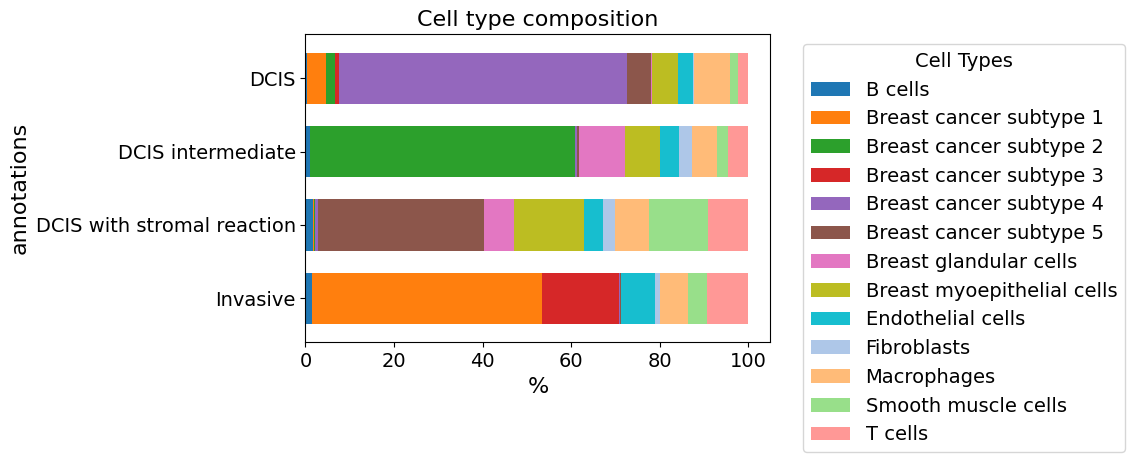

<Figure size 640x480 with 0 Axes>

In [11]:
plot_cellular_composition(
    data=xd, cell_type_col="cell_type_dc_sub",
    key="Katja", modality="annotations", #max_cols=3,
    show_labels=True, plot_type="barh",
    savepath="figures/cell_composition_barh_annotations_Katja.pdf"
)

Saving figure to file figures/cell_composition_barh_regions_Katja.pdf
Saved.


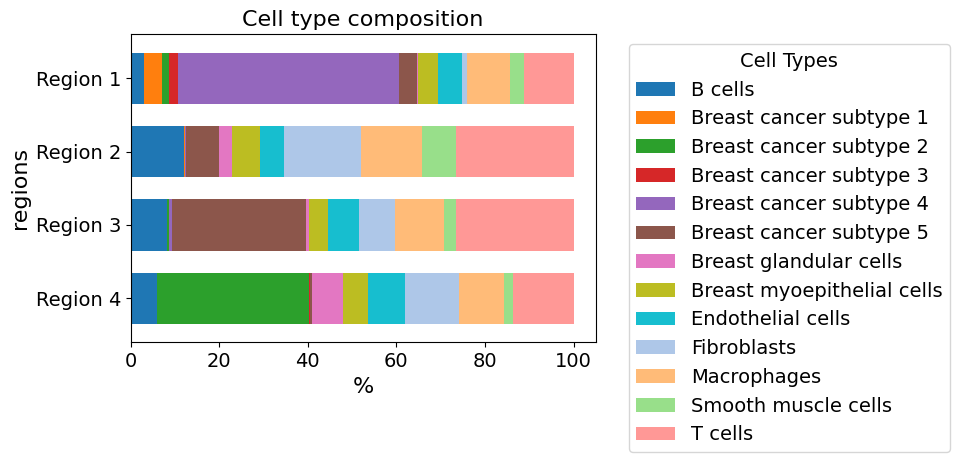

<Figure size 640x480 with 0 Axes>

In [12]:
plot_cellular_composition(
    data=xd, cell_type_col="cell_type_dc_sub",
    key="Katja", modality="regions", #max_cols=3,
    show_labels=True, plot_type="barh",
    savepath="figures/cell_composition_barh_regions_Katja.pdf"
)

In [36]:
xd.save()

Updating project in C:\Users\ge37voy\.cache\InSituPy\out\demo_insitupy_project
	Updating cells...
	Updating annotations...
	Updating regions...
Saved.


## Next steps for DGE analysis

1. Subtype 1 and 3 in invasive tumor - 1 is in the center and 3 as outer budding layer. Also some individual tumor cells with subtype 3 found. What is the difference between the two subtypes?
    - DGE analysis within invasive Tumor annotation - subtype 3 vs. subtype 1


In [13]:
from insitupy import differential_gene_expression

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_invasive_subtype3_vs_subtype1.pdf
Saved.


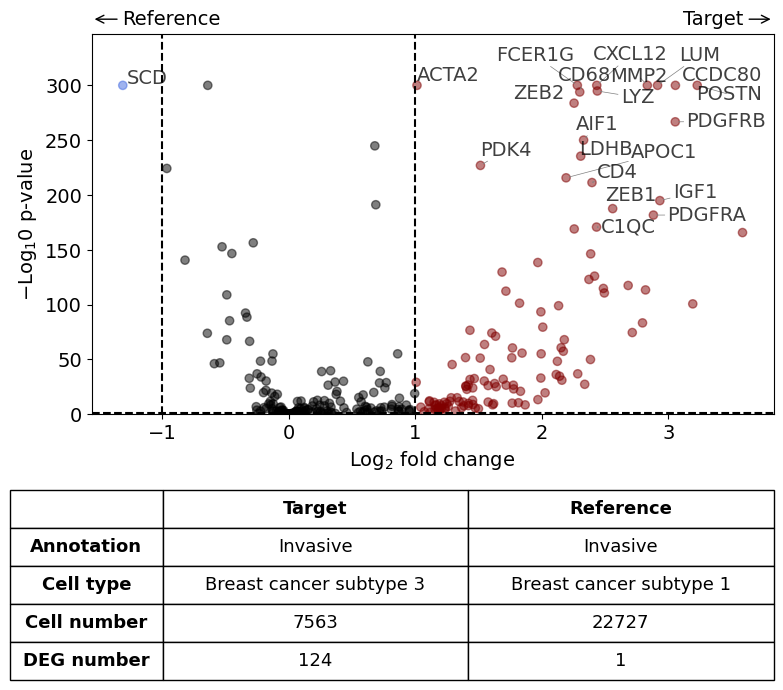

In [54]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "Invasive"),
    ref_annotation_tuple="same",
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 3"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 1"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    savepath="figures/volcano_invasive_subtype3_vs_subtype1.pdf"
)

### Comparison of DCIS vs invasive

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_subtype4_vs_subtype1.pdf
Saved.


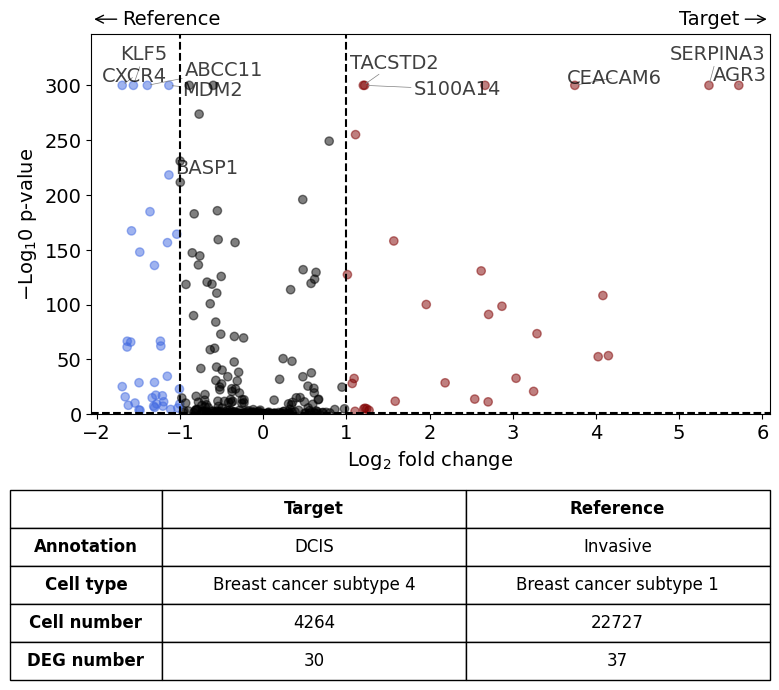

In [50]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS"),
    ref_annotation_tuple=("Katja", "Invasive"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 4"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 1"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    savepath="figures/volcano_subtype4_vs_subtype1.pdf"
)

### Comparison of DCIS vs DCIS with stromal reaction

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_subtype4_vs_subtype5.pdf
Saved.


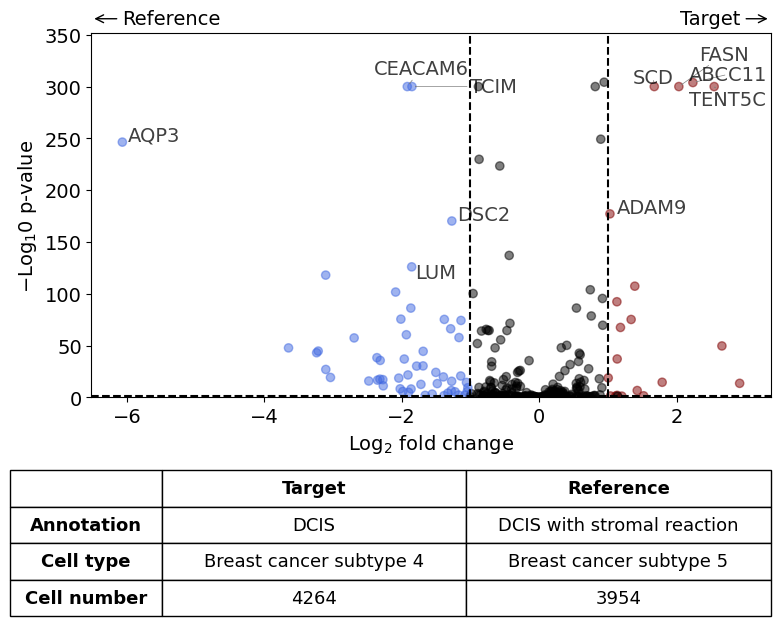

In [23]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 4"),
    ref_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    savepath="figures/volcano_subtype4_vs_subtype5.pdf"
)

## AQP3 expression higher in subtype 5 DCIS in Region 3 compared to subtype 5 DCIS in Region 2.

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_stromalDCIS_region3_vs_region2.pdf
Saved.


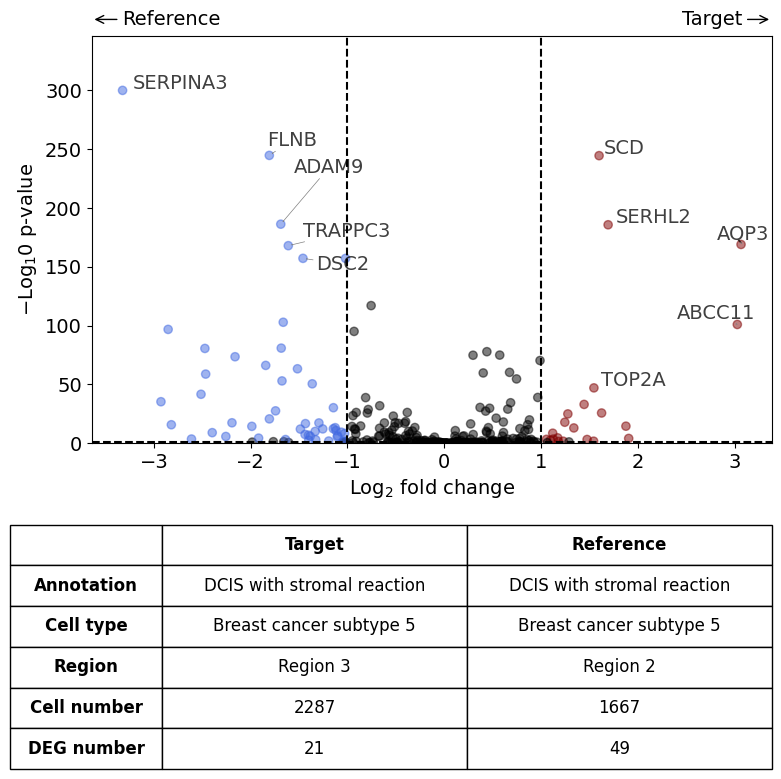

In [53]:
differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    ref_cell_type_tuple="same",
    target_region_tuple=("Katja", "Region 3"),
    ref_region_tuple=("Katja", "Region 2"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    savepath="figures/volcano_stromalDCIS_region3_vs_region2.pdf"
)

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.
Saving figure to file figures/volcano_stromalDCIS_region3_vs_region2.pdf
Saved.


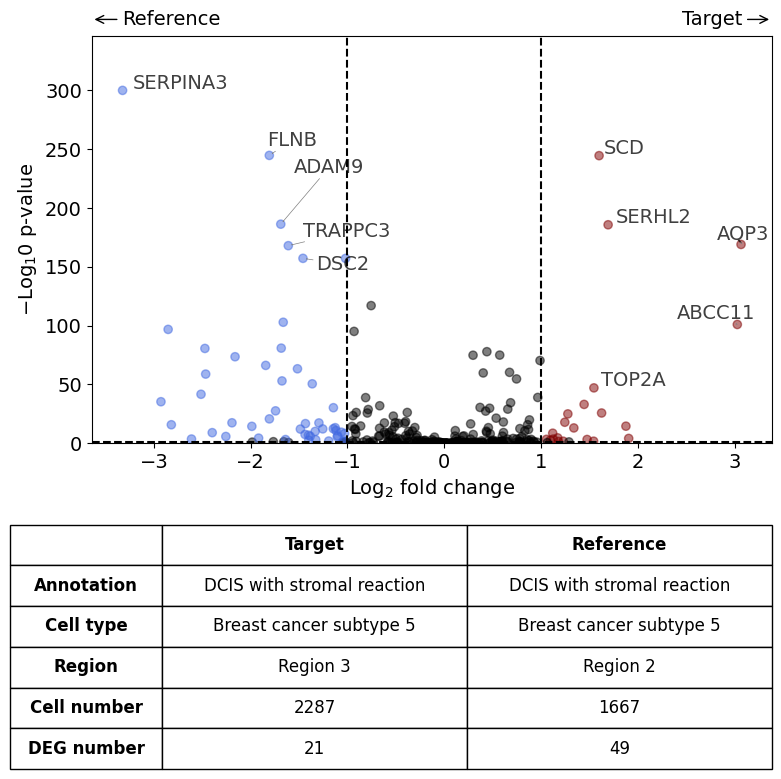

In [55]:
results = differential_gene_expression(
    target=xd,
    target_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    ref_annotation_tuple=("Katja", "DCIS with stromal reaction"),
    target_cell_type_tuple=("cell_type_dc_sub", "Breast cancer subtype 5"),
    ref_cell_type_tuple="same",
    target_region_tuple=("Katja", "Region 3"),
    ref_region_tuple=("Katja", "Region 2"),
    exclude_ambiguous_assignments=True, # in this case we are sure that there
    label_top_n=5,
    return_results=True,
    savepath="figures/volcano_stromalDCIS_region3_vs_region2.pdf"
)

## GO term enrichment analysis

In [60]:
from insitupy.utils.go import GOEnrichment, get_up_down_genes

In [64]:
df = results["results"]
genes_up, genes_down = get_up_down_genes(df, pval_threshold=0.05, logfold_threshold=1)

In [65]:
genes_up

['SCD',
 'SERHL2',
 'AQP3',
 'ABCC11',
 'TOP2A',
 'CXCR4',
 'MKI67',
 'CENPF',
 'MZB1',
 'RAPGEF3',
 'CD68',
 'FCER1G',
 'HAVCR2',
 'NCAM1',
 'SOX18',
 'CCL5',
 'EGFL7',
 'SELL',
 'LY86',
 'TPSAB1',
 'RAMP2']

In [66]:
go = GOEnrichment()
go.gprofiler(target_genes=genes_up, key_added='up',
             top_n=20, organism="hsapiens", return_df=False)
go.gprofiler(target_genes=genes_down, key_added='down',
             top_n=20, organism="hsapiens", return_df=False)

In [67]:
go

GOEnrichment analyses performed:
  gprofiler:
    - up
    - down

In [68]:
enrichment = go.results["gprofiler"]["down"]
enrichment.head()

source                 native  \
query 0   KEGG             KEGG:05215   
      1  MIRNA  MIRNA:mmu-miR-200c-3p   
      2  MIRNA  MIRNA:mmu-miR-200b-3p   
      3  MIRNA  MIRNA:mmu-miR-200a-3p   
      4  GO:MF             GO:0005017   

                                                     name   p_value  \
query 0                                   Prostate cancer  0.000577   
      1                                   mmu-miR-200c-3p  0.000645   
      2                                   mmu-miR-200b-3p  0.000645   
      3                                   mmu-miR-200a-3p  0.000645   
      4  platelet-derived growth factor receptor activity  0.000669   

         significant                                        description  \
query 0         True                                    Prostate cancer   
      1         True                                    mmu-miR-200c-3p   
      2         True                                    mmu-miR-200b-3p   
      3         True                                    mmu-miR-200a-3p   
      4         True  "Combining with platelet-derived growth factor...   

         term_size  query_size  intersection_size  effective_domain_size  \
query 0         97          13                  4                   8484   
      1          2          18                  2                  14822   
      2          2          18                  2                  14822   
      3          2          18                  2                  14822   
      4          3          19                  2                  20196   

         precision  Gene ratio    query         parents  \
query 0   0.307692    0.041237  query_1    [KEGG:00000]   
      1   0.111111    1.000000  query_1  [MIRNA:000000]   
      2   0.111111    1.000000  query_1  [MIRNA:000000]   
      3   0.111111    1.000000  query_1  [MIRNA:000000]   
      4   0.105263    0.666667  query_1    [GO:0004714]   

                        intersections  \
query 0  [TCF7, ZEB1, PDGFRB, PDGFRA]   
      1                  [ZEB1, ZEB2]   
      2                  [ZEB1, ZEB2]   
      3                  [ZEB1, ZEB2]   
      4              [PDGFRB, PDGFRA]   

                                                 evidences  Enrichment score  
query 0                   [[KEGG], [KEGG], [KEGG], [KEGG]]          3.238647  
      1                                 [[MIRNA], [MIRNA]]          3.190517  
      2                                 [[MIRNA], [MIRNA]]          3.190517  
      3                                 [[MIRNA], [MIRNA]]          3.190517  
      4  [[IDA, IMP, IBA, TAS, IEA], [IDA, IMP, IBA, IEA]]          3.174794

In [69]:
from insitupy.plotting.go import go_plot

Saving figure to file figures/go_stromalDCIS_region3_vs_region2.pdf
Saved.


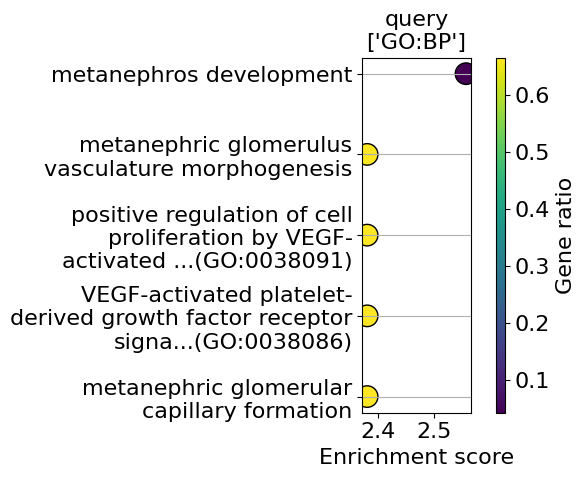

In [73]:
go_plot(enrichment=enrichment,
        style='dot',
        libraries='GO:BP',
        max_to_plot=5,
        figsize=(6,5),
        savepath="figures/go_stromalDCIS_region3_vs_region2.pdf"
        )

## Visualize data and save the colorlegends for publication

In [74]:
xd.show()

In [79]:
xd.save_current_colorlegend("figures/colorlegend_SERPINA3.pdf")

Figure saved as figures/colorlegend_SERPINA3.pdf
